# DATA 5600: Introduction to Regression and Machine Learning for Analytics

## __Some Brief Notes on Sampling Theory__ <br>

Author:  Tyler J. Brough <br>
Updated: October 11, 2021 <br>

---

<br>

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

In [2]:
## set the prng seed value
np.random.seed(7041776)

---

## __Sampling Theory__

These notes are based upon readings from the following books:

* _Introduction to Probability and Mathematical Statistics_ by Bain & Engelhart

* _Mathematical Statistics with Applications_ by Wackerly, Mendenhall, and Scheaffer

* _Statistics for Business and Economics_ by McClave, Benson, and Sincich

<br>

We will begin our discussion of sampling theory with a brief discussion of the __Central Limit Theorem__. 


* __NB:__ It gets its name by being ___central___ to the frequentist approach to statistical inference.

<br>

### __The Central Limit Theorem__

---

Let $X_{1}, X_{2}, \ldots X_{n}$ be independent and identically 
distributed (_iid_) random variables with $E(X_{i}) = \mu$ and
$V(X_{i}) = \sigma^{2} < \infty$. Define

<br>

$$
Z_{n} = \sqrt{n} \left( \frac{\bar{X} - \mu}{\sigma} \right) \quad \mbox{where} \quad \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_{i}
$$

<br>

Then the distribution function of $Z_{n}$ converges to a standard
normal distribution as $n \rightarrow \infty$.


That is, $Z_{n} \xrightarrow{d} Z \sim N(0, 1)$ as $n \rightarrow \infty$. 

---

<br>

### __Examples__

<br>


##### <u><b>Example 1</b></u>

<br>

Let us simulate random samples of size $n$ from an exponential distribution with mean 10.

<br>

Let's start with 1000 samples each of size $n = 5$.

<br>


In [4]:
## 1000 samples
m = 1000

## sample size n = 5
n = 5

## the true expected value
λ = 10

## store the data in an ndarray
x = np.empty((m,n))

for i in range(m):
    x[i] = np.random.exponential(scale=λ, size=n)

In [5]:
xbars = np.mean(x, axis=1)
mu_hat = np.mean(xbars)
sigma_hat = np.var(xbars)

In [6]:
mu_hat, sigma_hat

(10.03289023523941, 20.147148621371958)

<br>

Let's repeat for $n = 25$.

<br>

In [7]:
## 1000 samples
m = 1000

## sample size n = 5
n = 25

## the true expected value
λ = 10

## store the data in an ndarray
x = np.empty((m,n))

for i in range(m):
    x[i] = np.random.exponential(scale=λ, size=n)

In [8]:
xbars = np.mean(x, axis=1)
mu_hat = np.mean(xbars)
sigma_hat = np.var(xbars)

In [9]:
mu_hat, sigma_hat

(9.973393756081938, 3.956333808642589)

<br>

For each value of $n$ (5 and 25), we calculated the average of the 1000 sample means generated in the simulation. The observed variance of 1000 sample means was also calculated for each value of $n$. The results are shown in the table below.

<br>


|Sample Size | Avg. of Sample Means | Population $\mu$ | Var. of Sample Means | Population Variance ($\sigma^{2}/n$) |
|:-----------|:--------------------:|:----------------:|:--------------------:|:------------------------------------:|
| $n = 5$    | 10.03                | 10               | 20.15                | 20                                   |
| $n = 25$   | 9.98                 | 10               | 3.96                 | 4                                    |

<br>

What if we had a single sample of size $n = 100$ from this distribution? 

In [10]:
## set the sample size to n = 100
n = 100

## simulate the data-generating process
x = np.random.exponential(scale=λ, size=n)

In [11]:
## inspect the first 25 observations
x[:25]

array([1.07336124e-04, 1.09399857e+01, 2.37618926e+00, 3.63517941e-01,
       2.32187552e+01, 2.28728527e+01, 1.01766569e+01, 1.56948072e+01,
       2.32570659e-01, 3.53773218e+00, 2.78493118e+01, 8.72847441e-01,
       3.91312576e+00, 7.10472281e+00, 3.47588039e+00, 7.00238413e+00,
       1.64389911e+01, 6.07787807e-01, 9.25128230e-02, 8.96943333e+00,
       5.12785651e+00, 8.41571201e+00, 3.99028018e+00, 2.07298824e+01,
       1.48315203e+00])

In [13]:
np.var(x)

97.56446199253325

In [12]:
## calculate sample statistics
xbar = np.mean(x)
xsterr = np.std(x, ddof=1) / np.sqrt(n)
(xbar, xsterr)

(10.95967116207801, 0.9927233331025288)

<br>

This Central Limit Theorem tells us that $\bar{X} \sim N(10, 1)$. We estimated an approximate sampling distribution of $N(10.96, 0.99)$, which is pretty close!

<br>

##### <u><b>Example 2</b></u>

<br>

Achievement test scores of all high school seniors in a certain state have mean 60 and variance 64. A random sample of $n = 100$ students from one large high school had a mean score of 58.
Is there evidence to suggest that this high school is inferior? 

__NB:__ (Calculate the probability that the sample mean is at most 58 when $n = 100$.)

<br>

##### <u><b>Solution</b></u>

<br>

Let $\bar{X}$ denote the mean of a random sample of $n = 100$ scores from a population with $\mu = 60$ and $\sigma^{2} = 64$. We want to approximate $P(\bar{X} \le 58)$. 
We can use the CLT to state that $(\bar{X} - \mu) / \sigma / \sqrt{n}$ is approximately a standard normal random variable, which we denote $Z$.

<br>

$$
P(\bar{X} \le 58) \approx P\left(Z \le \frac{58 - 60}{\sqrt{64/100}} \right) = P(Z \le -2.5) = 0.0062
$$

<br>

Because this probabily is so small, it is unlikely that the sample from the school in question can be regarded as a random sample from a population with $\mu = 60$ and $\sigma^{2} = 64$. The
evidence suggests that the average score for this high school is lower than the overall average of $\mu = 60$.

<br>
<br>


##### <u><b>Example 3</b></u>

<br>

The service times for customers coming through a checkout counter in a retail store are independent random variables with mean $1.5$ minutes and variance $1.0$. Approximate the probability that
100 customers can be serviced in less than 2 hours of total service time. 

<br>

##### <u><b>Solution</b></u>

<br>

If we let $X_{i}$ denote the service time for the $i$th customer, then we want

<br>

$$
P\left( \sum\limits_{i=1}^{100} X_{i} \le 120 \right) = P\left(\bar{X} \le \frac{120}{100} \right) = P(\bar{X} \le 1.20)
$$

<br>

Because the sample size is large, the CLT tells us that $\bar{X}$ is approximately normally distributed with mean $\mu_{\bar{X}} = \mu = 1.5$ and variance
$\sigma_{\bar{X}}^{2} = \sigma^{2}/n = 1.0/100$. Therefore, we have the following

<br>

$$
\begin{aligned}
P(\bar{X} \le 1.20) &= P\left(\frac{\bar{X} - 1.50}{1/\sqrt{100}} \le \frac{1.20 - 1.50}{1/\sqrt{100}} \right) \\
& \\
                    & \approx P[Z \le (1.2 - 1.5) \sqrt{100}] = P(Z \le -3) = 0.0013
\end{aligned}
$$

<br>

Thus the probability that 100 customers can be serviced in less than 2 hours is approximately $0.0013$. This small probability indicates that it is virtually impossible
to service 100 customers in only 2 hours.

<br>


##### <u><b>Example 4</b></u>

<br>

Suppose we have selected a random sample of $n = 36$ observations from a population with mean equal to 80 and standard deviation equal to 6. It is known that the population is not
extremely skewed. 

<br>

* __a.__ Sketch the the sampling distribution of the sample mean, $\bar{X}$.

* __b.__ Find the probability that $\bar{X}$ will be larger than 82.

<br>

##### <u><b>Solution</b></u>

<br>

__a.__ 

We do not know the exact shape of the population relative frequency distribution, but we do know that it should be centered about $\mu = 80$,
its spread should be measured by $\sigma = 6$, and it is not highly skewed. 

The CLT tells us that the sampling distribution of $\bar{X}$ will be approximately normal. It will have mean and standard deviatiion

<br>

$$
\mu_{\bar{X}} = \mu = 80 \quad \quad \sigma_{bar{X}} = \frac{\sigma}{\sqrt{n}} = \frac{6}{\sqrt{36}} = 1
$$

<br>

We have graph this curve as follows:

<br>

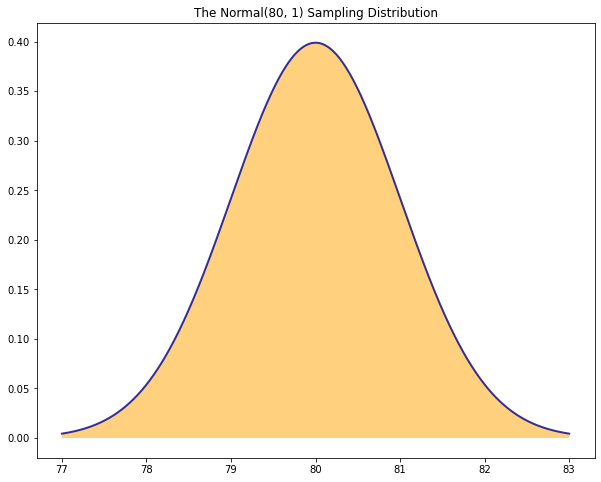

In [14]:
x = np.linspace(77, 83, 1000)
y = stats.norm.pdf(x, loc=80, scale=1)
plt.plot(x, y, lw = 2.0, color='darkblue', alpha=0.8)
plt.fill_between(x, y, facecolor='orange', alpha=0.5)
plt.title(f"The Normal(80, 1) Sampling Distribution")
plt.show()

__b.__

The probability that $\bar{X}$ will exceed 82 is equal to the area under the curve to the left of the value 82. To find this area, we need to find the $z$ value corresponding to $\bar{X} = 82$.

Recall that the standard normal random variable $z$ is the difference between any normally distributed random variable and its mean, expressed in units of its standard deviation.

Because $\bar{X}$ is approximately a normally distributed random variable with mean $\mu_{\bar{X}} = \mu$ and $\sigma_{\bar{X}} = \sigma/\sqrt{n}$, it follows that the standard normal $z$
value corresponding to the sample mean, $\bar{X}$, is

<br>

$$
z = \frac{(\mbox{Normal random variable}) - (\mbox{Mean})}{\mbox{Standard deviation})} = \frac{\bar{X} - \mu_{\bar{X}}}{\sigma_{\bar{X}}}
$$

<br>

Therefore, for $\bar{X} = 82$, we have

<br>

$$
z = \frac{\bar{X} - \mu_{\bar{X}}}{\sigma_{\bar{X}}} = \frac{82 - 80}{1} = 2
$$

<br>

The tail area corresponding to the probability that $\bar{X}$ exceeds 82 is

<br>

$$
P(\bar{X} > 82) = P(x > 2) = 0.0228
$$

<br>

__NB:__ (We want to use the complement rule to get the area under the curve to the right)

<br>

In [15]:
1. - stats.norm.cdf(82, loc=80, scale=1)

0.02275013194817921

In [16]:
1. - stats.norm.cdf(2) ## defaults: loc = 0, scale = 1

0.02275013194817921

<br>
<br>

##### <u><b>Example 5</b></u>

<br>

A manufacturer of automobile batteries claims that the distribution of the lengths of life of its best battery has a mean of 54 months and a standard deviation of
6 months. Recently, the manufacturer has received a rash of complaints from unsatisfied customers whose batteries have died earlier than expected.

Suppose a consumer group decides to check the manufacturer's claim by purchasing a sample of 50 of these batterieis and subjecting them to tests that determine
battery life. 

<br>

* __a.__ Assuming that the manufacturer's claim is true, describe the sampling distribution of the mean lifetime of a sample of 50 batteries. 

* __b.__ Assuming that the manufacturer's claim is true, what is the probability that the consumer group's sample has a mean life of 52 or fewer months? 

<br>

##### <u><b>Solution</b></u>

<br>

__a.__ 


Even though we have no information about the shape of the probability distribution of the lives of the batteries, we can use the CLT to deduce that the
sampling distribution for a sample mean lifetime of 50 batteries is approximately normally distributed. 

The mean of this sampling distribution is the same as the mean of the sampled population, which $\mu = 54$ months according to the manufacturer's claim.

Finally, the standard deviation of the sampling distribution is given by

<br>

$$
\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}} = \frac{6}{\sqrt{50}} = 0.85 \mbox{  months}
$$

<br>

Note that we used the claimed standard deviation of the sampled population, $\sigma = 6$ months. Thus, if we assume that the claim is true, the sampling
distribution for the mean life of 50 batteries is as shown below

<br>

In [ ]:
x = np.linspace(50, 58, 1000)
y = stats.norm.pdf(x, loc=54, scale=0.85)
plt.plot(x, y, lw = 2.0, color='darkblue', alpha=0.8)
plt.fill_between(x, y, facecolor='orange', alpha=0.5)
plt.title(f"The Normal(54, 0.85) Sampling Distribution")
plt.show()

<br>

__b.__

If the manufacturer's claim is true, the probability that the consumer group observes a mean battery life of 52 or fewer months for their sample of 50 batteries,
$P(\bar{X} \le 52)$, is equivalent to the area under the curve to the left of the value 52. 

Because the sampling distribution is approximately normal, we can find this area by computing the standard $z$ value:

<br>

$$
z = \frac{\bar{X} - \mu_{\bar{X}}}{\sigma_{\bar{X}}} = \frac{52 - 54}{0.85} = -2.35
$$

<br>

Therefore, the area to the left $\bar{X} = 52$ is 

<br>

$$
P(\bar{X} \le 52) = P(z \le -2.35) \approx 0.0094
$$

<br>

Thus if the manufacturer's claim is true this is a very small probability.

<br>

In [ ]:
stats.norm.cdf(52, loc=54, scale=0.85)

In [ ]:
stats.norm.cdf(-2.35)

<br>
<br>

### __The Empirical CDF__

---

Let $X_{1}, X_{2}, \ldots, X_{n}$ be independent, identically distributed real random variables witih the common CDF $F(t)$. Then the __empirical cumulative distribution function (eCDF)__ is defined as

<br>

$$
\hat{F_{n}}(t) = \frac{1}{n} \sum\limits_{i=1}^{n} \mathbf{{I}}\{x_{i} \le t\}
$$

<br>

where $\mathbf{{I}}\{x_{i} \le t\}$ is an indicator function. 

---

<br>
<br>

In [ ]:
## Calculate the CDF of 2
stats.norm.cdf(1.96)

In [ ]:
## Calculate the eCDF of 2
z = np.random.normal(size=100_000)
I = z >= 1.96
1 - np.sum(I) / 100_000

In [ ]:
## Calculate the PPF of 0.975
stats.norm.ppf(0.975)

In [ ]:
## Calculate the ePPF of 0.975
z.sort()
ii = int(0.975 * 100_000)
z[ii]